# Figures
Author: Mark Bauer

In [1]:
# import libraries
import duckdb
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# reproducibility
%reload_ext watermark
%watermark -v -p duckdb,pandas,geopandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

duckdb    : 1.0.0
pandas    : 1.5.1
geopandas : 0.12.1
matplotlib: 3.6.2
seaborn   : 0.12.1



In [3]:
# data retrieved
current_date = datetime.now()
print(f"This notebook was executed on {current_date.strftime('%Y-%m-%d')}.")

This notebook was executed on 2024-10-03.


# Read In Data

In [4]:
# duckdb connection
con = duckdb.connect()

# create public assistance table
con.execute("""
    CREATE TABLE public_assistance AS
    FROM read_parquet('https://www.fema.gov/api/open/v1/PublicAssistanceFundedProjectsSummaries.parquet')
"""
)

# sanity check
sql = """
    SELECT *
    FROM public_assistance
    LIMIT 10
"""

con.sql(sql)

┌──────────────────────┬────────────────┬─────────────────┬───┬──────────────────────┬──────────────────────┐
│          id          │ disasterNumber │ declarationDate │ … │     lastRefresh      │         hash         │
│       varchar        │     int16      │      date       │   │      timestamp       │       varchar        │
├──────────────────────┼────────────────┼─────────────────┼───┼──────────────────────┼──────────────────────┤
│ 0646e381-ea0a-46e5…  │           1239 │ 1998-08-26      │ … │ 2023-03-18 17:02:4…  │ a18872962143d707fb…  │
│ bc05fe25-0f1e-4344…  │           1239 │ 1998-08-26      │ … │ 2023-03-18 17:02:4…  │ d1c77a224203725a79…  │
│ d9c845c8-5db4-404b…  │           1239 │ 1998-08-26      │ … │ 2023-03-18 17:02:4…  │ 7fb2d6dd706512236b…  │
│ 9350e760-64da-4931…  │           1239 │ 1998-08-26      │ … │ 2023-03-18 17:02:4…  │ 571fab79609fe373f6…  │
│ a196ef51-9883-47c8…  │           1239 │ 1998-08-26      │ … │ 2023-03-18 17:02:4…  │ 39207f1c57e1f088be…  │
│ 39de6538

# Describe and Summarize Data

In [5]:
# count rows
con.sql("SELECT COUNT(id) AS count_rows FROM public_assistance")

┌────────────┐
│ count_rows │
│   int64    │
├────────────┤
│     185652 │
└────────────┘

In [6]:
# examine column datatypes
sql = "DESCRIBE SELECT * FROM public_assistance"
describe_relation = con.sql(sql)

(con
 .sql("SELECT column_name, column_type FROM describe_relation")
 .show(max_rows=50)
)

┌────────────────────────┬─────────────┐
│      column_name       │ column_type │
│        varchar         │   varchar   │
├────────────────────────┼─────────────┤
│ id                     │ VARCHAR     │
│ disasterNumber         │ SMALLINT    │
│ declarationDate        │ DATE        │
│ incidentType           │ VARCHAR     │
│ state                  │ VARCHAR     │
│ county                 │ VARCHAR     │
│ applicantName          │ VARCHAR     │
│ educationApplicant     │ BOOLEAN     │
│ numberOfProjects       │ SMALLINT    │
│ federalObligatedAmount │ DOUBLE      │
│ lastRefresh            │ TIMESTAMP   │
│ hash                   │ VARCHAR     │
├────────────────────────┴─────────────┤
│ 12 rows                    2 columns │
└──────────────────────────────────────┘



In [7]:
# summary statistics
sql = "SUMMARIZE SELECT * FROM public_assistance"
summarize_relation = con.sql(sql)

summarize_relation.df()

,column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
0,id,VARCHAR,00002220-90a3-474a-a2fc-5cd033195b36,ffff6434-3cc9-4130-8363-32de43bddcb8,187613,None,None,None,None,None,185652,0.0
1,disasterNumber,SMALLINT,1239,4812,1648,2909.3991661818886,1259.0059165904195,1691,3150,4245,185652,0.0
2,declarationDate,DATE,1998-08-26,2024-08-20,1264,None,None,None,None,None,185652,0.0
3,incidentType,VARCHAR,Biological,Winter Storm,28,None,None,None,None,None,185652,0.0
4,state,VARCHAR,Alabama,Wyoming,63,None,None,None,None,None,185652,0.0
5,county,VARCHAR,,Ziebach,3554,None,None,None,None,None,185652,0.0
6,applicantName,VARCHAR,#9 AREA FIRE DEPARTMENT,plainville,87293,None,None,None,None,None,185652,0.0
7,educationApplicant,BOOLEAN,false,true,2,None,None,None,None,None,185652,0.0
8,numberOfProjects,SMALLINT,0,2685,328,4.482418718893413,17.361197327824826,1,2,4,185652,0.0
9,federalObligatedAmount,DOUBLE,-1850352.29,12954204261.16,174805,1276227.0047087406,53117208.56566425,6687.23022716714,23306.762525691047,96196.14572380968,185652,0.0


In [8]:
# examine NULL percentage
sql = """
    SELECT column_name, column_type, null_percentage
    FROM summarize_relation
    ORDER BY null_percentage DESC
"""

con.sql(sql).show(max_rows=50)

┌────────────────────────┬─────────────┬─────────────────┐
│      column_name       │ column_type │ null_percentage │
│        varchar         │   varchar   │  decimal(9,2)   │
├────────────────────────┼─────────────┼─────────────────┤
│ id                     │ VARCHAR     │            0.00 │
│ disasterNumber         │ SMALLINT    │            0.00 │
│ declarationDate        │ DATE        │            0.00 │
│ incidentType           │ VARCHAR     │            0.00 │
│ state                  │ VARCHAR     │            0.00 │
│ county                 │ VARCHAR     │            0.00 │
│ applicantName          │ VARCHAR     │            0.00 │
│ educationApplicant     │ BOOLEAN     │            0.00 │
│ numberOfProjects       │ SMALLINT    │            0.00 │
│ federalObligatedAmount │ DOUBLE      │            0.00 │
│ lastRefresh            │ TIMESTAMP   │            0.00 │
│ hash                   │ VARCHAR     │            0.00 │
├────────────────────────┴─────────────┴────────────────

# Preview Values

In [9]:
sql = """
    SELECT
        *
    FROM
        public_assistance
    LIMIT 5   
"""

con.sql(sql).df()

,id,disasterNumber,declarationDate,incidentType,state,county,applicantName,educationApplicant,numberOfProjects,federalObligatedAmount,lastRefresh,hash
0,0646e381-ea0a-46e5-993d-1bdb1cfe2a27,1239,1998-08-26,Severe Storm,Texas,Edwards,EDWARDS (COUNTY),False,20,352427.09,2023-03-18 17:02:48.443,a18872962143d707fb83e3f0b054abda40413d04
1,bc05fe25-0f1e-4344-a120-55f23f45cd4e,1239,1998-08-26,Severe Storm,Texas,Kimble,"JUNCTION, CITY OF",False,1,6234.90,2023-03-18 17:02:48.443,d1c77a224203725a79d26a1d84f8ad2b06b36c7f
2,d9c845c8-5db4-404b-866d-e06b3c73397a,1239,1998-08-26,Severe Storm,Texas,Kimble,KIMBLE (COUNTY),False,5,69933.35,2023-03-18 17:02:48.443,7fb2d6dd706512236b3ed6c0e6ddd6a633b50d38
3,9350e760-64da-4931-ace0-0e37d7e82eb3,1239,1998-08-26,Severe Storm,Texas,Kimble,TEXAS TECH UNIVERSITY CTR,True,1,2850.00,2023-03-18 17:02:48.443,571fab79609fe373f64529b540289ee5dd400ed5
4,a196ef51-9883-47c8-809d-1d797e8e1f48,1239,1998-08-26,Severe Storm,Texas,Kinney,FORT CLARK MUNICIPAL UTILITY,False,1,5016.00,2023-03-18 17:02:48.443,39207f1c57e1f088bef0ce07238c1aa9a18022d8


# Figures

In [10]:
sql = """
    SELECT
        disasterNumber,
        substring(declarationDate::VARCHAR, 1, 4) as year,
        state,
        incidentType,
        SUM(federalObligatedAmount) AS federalObligatedAmount
    FROM
        public_assistance
    GROUP BY ALL
    ORDER BY
        federalObligatedAmount DESC
    LIMIT
        20
"""

relation = con.sql(sql).df()

disasters_df = con.sql("""
    SELECT
        row_number() OVER () AS rank,
        disasterNumber,
        year,
        state,
        incidentType,
        ROUND(federalObligatedAmount / 1_000_000, 0)::INT AS federalObligatedAmountM
    FROM relation
""").df()


print(disasters_df.shape)
disasters_df

(20, 6)


,rank,disasterNumber,year,state,incidentType,federalObligatedAmountM
0,1,4339,2017,Puerto Rico,Hurricane,33962
1,2,4480,2020,New York,Biological,15056
2,3,4485,2020,Texas,Biological,14910
3,4,4085,2012,New York,Hurricane,14736
4,5,1603,2005,Louisiana,Hurricane,13525
5,6,4340,2017,Virgin Islands,Hurricane,12240
6,7,4482,2020,California,Biological,10609
7,8,1391,2001,New York,Fire,4709
8,9,1604,2005,Mississippi,Hurricane,3184
9,10,4486,2020,Florida,Biological,3052


In [11]:
print(disasters_df.to_markdown(index=False))

|   rank |   disasterNumber |   year | state          | incidentType   |   federalObligatedAmountM |
|-------:|-----------------:|-------:|:---------------|:---------------|--------------------------:|
|      1 |             4339 |   2017 | Puerto Rico    | Hurricane      |                     33962 |
|      2 |             4480 |   2020 | New York       | Biological     |                     15056 |
|      3 |             4485 |   2020 | Texas          | Biological     |                     14910 |
|      4 |             4085 |   2012 | New York       | Hurricane      |                     14736 |
|      5 |             1603 |   2005 | Louisiana      | Hurricane      |                     13525 |
|      6 |             4340 |   2017 | Virgin Islands | Hurricane      |                     12240 |
|      7 |             4482 |   2020 | California     | Biological     |                     10609 |
|      8 |             1391 |   2001 | New York       | Fire           |                   

In [12]:
sql = """
    SELECT
        substring(declarationDate::VARCHAR, 1, 4)::INT as year,
        ROUND(SUM(federalObligatedAmount) / 1_000_000)::INT AS federalObligatedAmountM
    FROM
        public_assistance
    GROUP BY 1
    ORDER BY
        federalObligatedAmountM DESC
"""

year_incident_df = con.sql(sql).df()

print(year_incident_df.shape)
year_incident_df.head()

(27, 2)


,year,federalObligatedAmountM
0,2020,88376
1,2017,54170
2,2005,21257
3,2012,17784
4,2018,6305


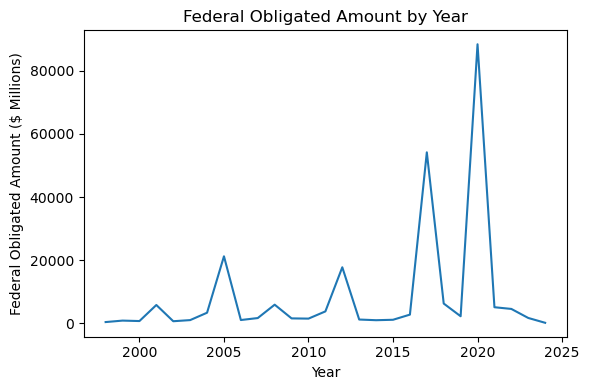

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(
    data=year_incident_df,
    x='year',
    y='federalObligatedAmountM',
    ax=ax
)

plt.title("Federal Obligated Amount by Year")
plt.xlabel("Year")
plt.ylabel("Federal Obligated Amount ($ Millions)")

plt.tight_layout()

In [14]:
sql = """
    SELECT
        incidentType,
        SUM(federalObligatedAmount) / 1_000_000 AS federalObligatedAmountM
    FROM
        public_assistance
    GROUP BY 1
    ORDER BY federalObligatedAmountM DESC
    LIMIT 10
"""

incident_df = con.sql(sql).df()

print(incident_df.shape)
incident_df.head()

(10, 2)


,incidentType,federalObligatedAmountM
0,Hurricane,113355.465305
1,Biological,81752.672809
2,Severe Storm,13092.177707
3,Fire,6398.730254
4,Flood,5370.081579


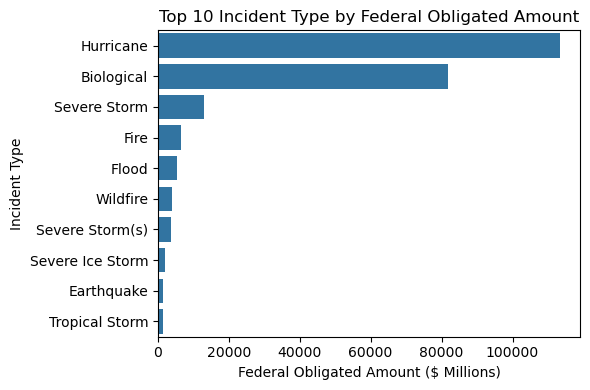

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.barplot(
    data=incident_df,
    y='incidentType',
    x='federalObligatedAmountM',
    color="C0",
    ax=ax
)

plt.title("Top 10 Incident Type by Federal Obligated Amount")
plt.ylabel("Incident Type")
plt.xlabel("Federal Obligated Amount ($ Millions)")

plt.tight_layout()

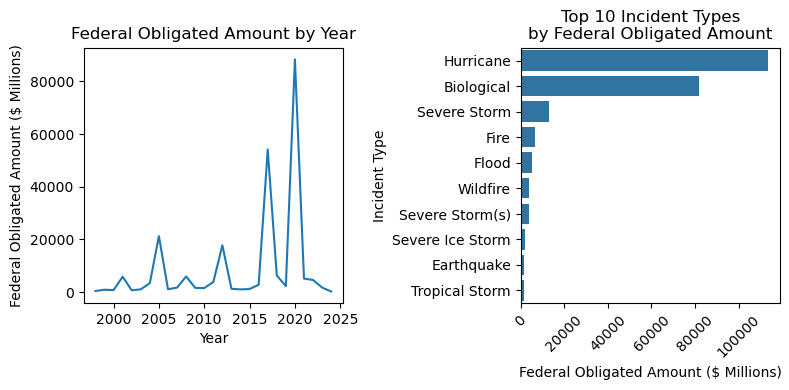

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.lineplot(
    data=year_incident_df,
    x='year',
    y='federalObligatedAmountM',
    ax=axs[0]
)

axs[0].set_title("Federal Obligated Amount by Year")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Federal Obligated Amount ($ Millions)")

sns.barplot(
    data=incident_df,
    y='incidentType',
    x='federalObligatedAmountM',
    color="C0",
    ax=axs[1]
)

axs[1].set_title("Top 10 Incident Types\nby Federal Obligated Amount")
axs[1].set_ylabel("Incident Type")
axs[1].set_xlabel("Federal Obligated Amount ($ Millions)")
axs[1].tick_params(axis='x', labelrotation = 45)

plt.tight_layout()
plt.savefig('figures/year-incident.png', dpi=200, bbox_inches='tight')

In [17]:
sql = """
    SELECT
        state,
        SUM(federalObligatedAmount) AS federalObligatedAmount
    FROM
        public_assistance
    GROUP BY 1
    ORDER BY federalObligatedAmount DESC
    LIMIT 20
"""

state_df = con.sql(sql).df()

print(state_df.shape)
state_df.head()

(20, 2)


,state,federalObligatedAmount
0,New York,3.747070e+10
1,Puerto Rico,3.680457e+10
2,Louisiana,2.470277e+10
3,Texas,2.266802e+10
4,California,1.700269e+10


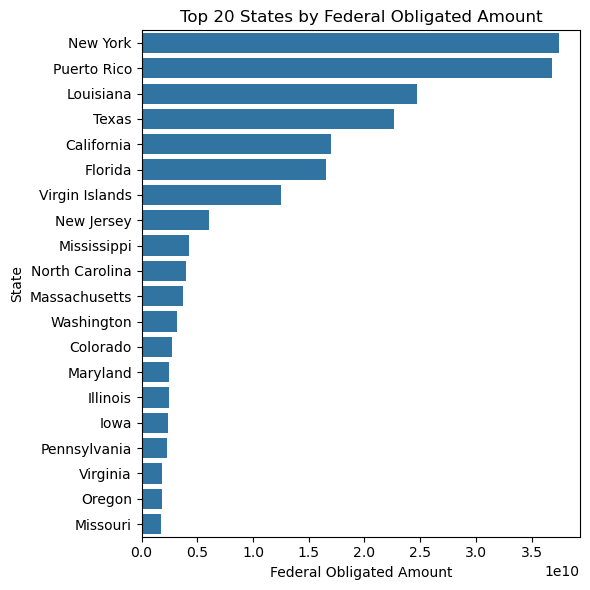

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(
    data=state_df,
    y='state',
    x='federalObligatedAmount',
    color="C0",
    ax=ax
)

plt.title("Top 20 States by Federal Obligated Amount")
plt.ylabel("State")
plt.xlabel("Federal Obligated Amount")

plt.tight_layout()

In [19]:
sql = """
    SELECT
        incidentType,
        state,
        SUM(federalObligatedAmount) / 1_000_000 AS federalObligatedAmountM
    FROM
        public_assistance
    GROUP BY 1, 2
    ORDER BY
        federalObligatedAmountM DESC
"""

incident_state_df = con.sql(sql).df()

print(incident_state_df.shape)
incident_state_df.head()

(440, 3)


,incidentType,state,federalObligatedAmountM
0,Hurricane,Puerto Rico,35547.364578
1,Hurricane,Louisiana,21112.502682
2,Hurricane,New York,15342.097227
3,Biological,New York,15059.999395
4,Biological,Texas,14909.743427


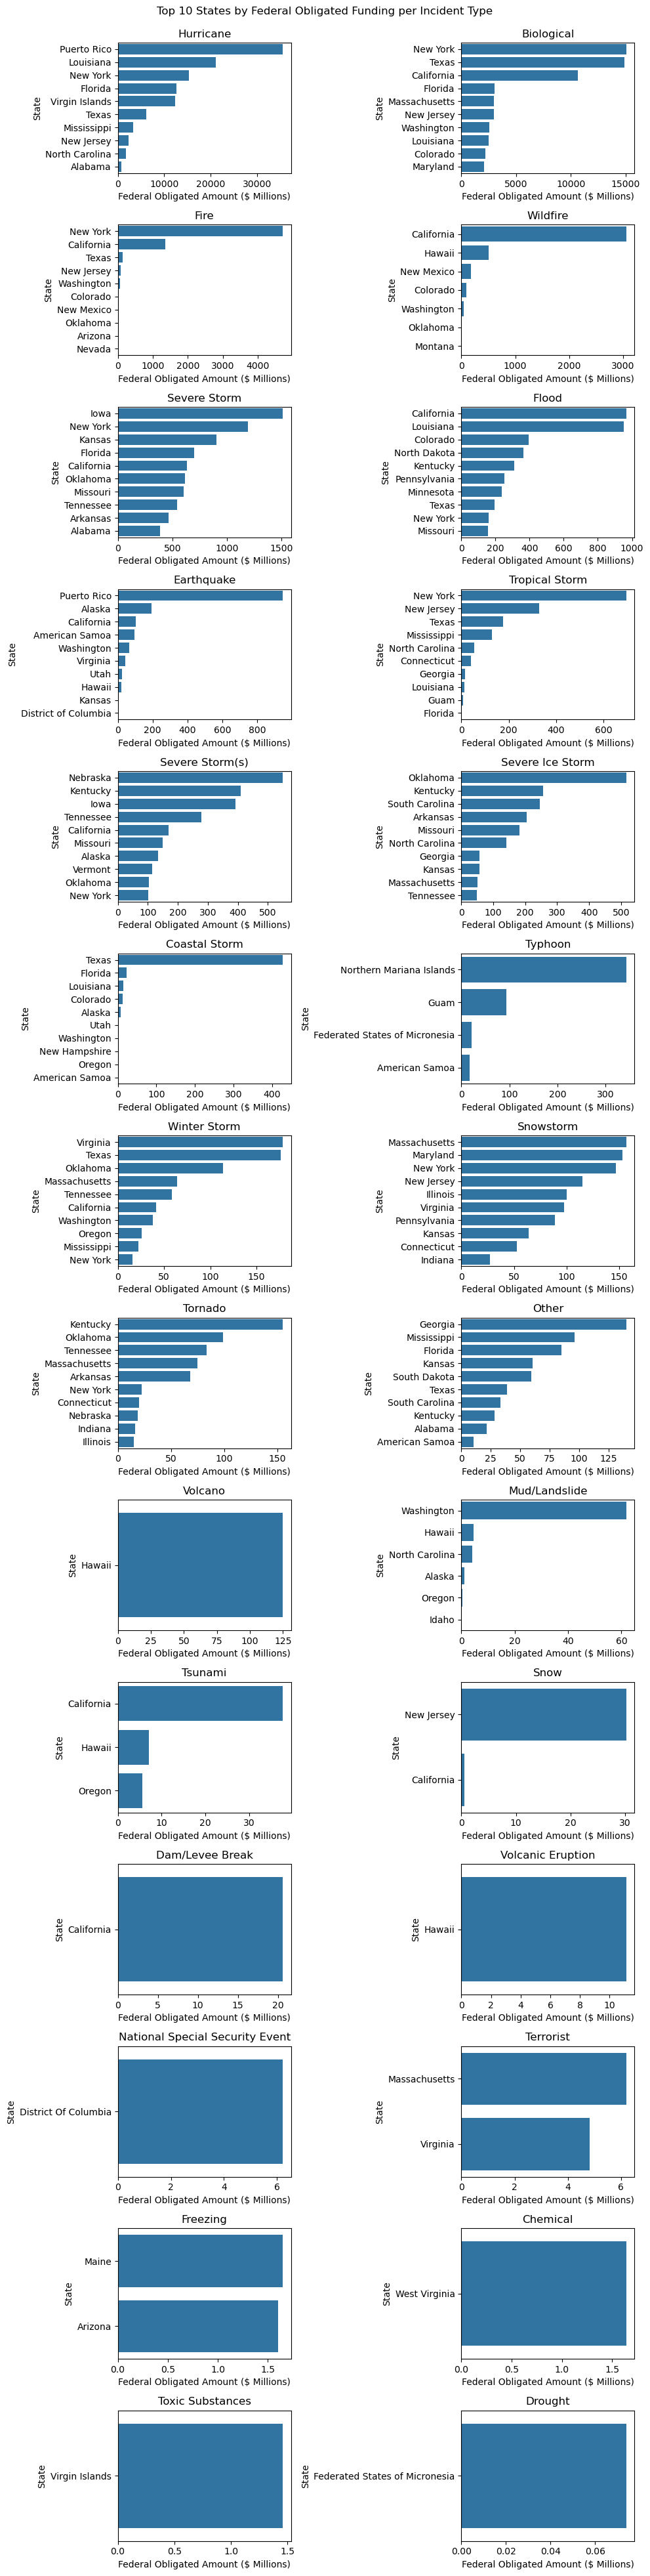

In [20]:
incidents = incident_state_df['incidentType'].unique()
fig, axs = plt.subplots(14, 2, figsize=(10, 40))
    
for incident, ax in zip(incidents, axs.flat):
    
    bar = (
        incident_state_df
        .loc[incident_state_df['incidentType'] == incident]
        .sort_values(by='federalObligatedAmountM', ascending=False)
        .head(10)
    )
    
    sns.barplot(
        data=bar,
        y='state',
        x='federalObligatedAmountM',
        color="C0",
        ax=ax
    )
    
    ax.set_title(incident)
    ax.set_xlabel('Federal Obligated Amount ($ Millions)')
    ax.set_ylabel('State')
    
plt.suptitle('Top 10 States by Federal Obligated Funding per Incident Type\n\n\n\n')    
fig.tight_layout()
fig.savefig('figures/incident-state.png', dpi=200, bbox_inches='tight')   